In [3]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd 
import math
import random

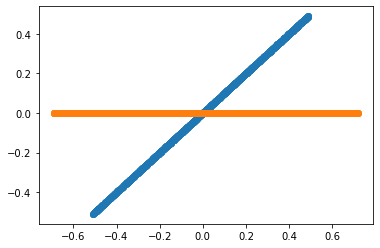

In [6]:
n =1 # the amount of correlation
x = np.random.uniform(1,2,1000)
y = x.copy()

# pca works better if the data is centered
x = x - np.mean(x) # center x remove its mean
y = y - np.mean(y) # center y remove its mean

data = pd.DataFrame({'x':x,'y':y}) # create datafram with x and y
plt.scatter(data.x , data.y) # plot the original correlated data in blue

pca = PCA(n_components=2) # instatntiate a PCA.choose to get 2 output variables

# create the tranformation model for thi dataInternally it gets the rotation matrix and the explanied varienace
pcaTr  = pca.fit(data)

rotatedData = pcaTr.transform(data)
 # Transform the data base on the rotation matrix of pcaTr
# # Create a data frame with the new variables. We call these new variables PC1 and PC2
dataPCA = pd.DataFrame(data = rotatedData,columns=['PC1','PC2'])

# plot the transformed data in orange
plt.scatter(dataPCA.PC1 , dataPCA.PC2)
plt.show()




## Understanding the transformation model pcaTr

In [7]:
print('Eigenvectors or principal component: First row must be in the direction of [1, n]')
print(pcaTr.components_)
print()
print('Eigenvalues or explained variance')
print(pcaTr.explained_variance_)

Eigenvectors or principal component: First row must be in the direction of [1, n]
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]

Eigenvalues or explained variance
[1.63047283e-01 1.59535549e-34]


## correlated normal random variables

angle :  45.0
rotationMAtrix
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


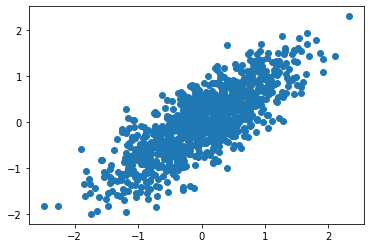

In [10]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

random.seed(100)

std1 = 1
std2 = 0.333

x = np.random.normal(0,std1,1000)
y = np.random.normal(0,std2,1000)

x = x -np.mean(x)
y = y-np.mean(y)

n = 1
angle = np.arctan(1/n)
print('angle : ',angle*180/math.pi )

rotationMatrix = np.array([[np.cos(angle),np.sin(angle)]                        ,[-np.sin(angle),np.cos(angle)]])

print('rotationMAtrix')
print(rotationMatrix)

xy = np.concatenate(([x] , [y]), axis=0).T # Create a matrix with columns x and y

# Transform the data using the rotation matrix. It correlates the two variables
data = np.dot(xy, rotationMatrix) # Return a nD array

# Print the rotated data
plt.scatter(data[:,0], data[:,1])
plt.show()



Eigenvectors or principal component: First row must be in the direction of [1, n]
[[ 0.71147133  0.70271513]
 [-0.70271513  0.71147133]]

Eigenvalues or explained variance
[0.94753457 0.10738143]


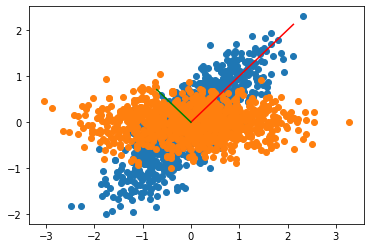

In [11]:
plt.scatter(data[:,0], data[:,1]) # Print the original data in blue

# Apply PCA. In theory, the Eigenvector matrix must be the 
# inverse of the original rotationMatrix. 
pca = PCA(n_components=2)  # Instantiate a PCA. Choose to get 2 output variables

# Create the transformation model for this data. Internally it gets the rotation 
# matrix and the explained variance
pcaTr = pca.fit(data)

# Create an array with the transformed data
dataPCA = pcaTr.transform(data)

print('Eigenvectors or principal component: First row must be in the direction of [1, n]')
print(pcaTr.components_)

print()
print('Eigenvalues or explained variance')
print(pcaTr.explained_variance_)

# Print the rotated data
plt.scatter(dataPCA[:,0], dataPCA[:,1])

# Plot the first component axe. Use the explained variance to scale the vector
plt.plot([0, rotationMatrix[0][0] * std1 * 3], [0, rotationMatrix[0][1] * std1 * 3], 'k-', color='red')
# Plot the second component axe. Use the explained variance to scale the vector
plt.plot([0, rotationMatrix[1][0] * std2 * 3], [0, rotationMatrix[1][1] * std2 * 3], 'k-', color='green')

plt.show()

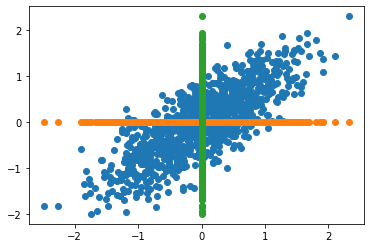

In [12]:
nPoints = len(data)

# Plot the original data in blue
plt.scatter(data[:,0], data[:,1])

#Plot the projection along the first component in orange
plt.scatter(data[:,0], np.zeros(nPoints))

#Plot the projection along the second component in green
plt.scatter(np.zeros(nPoints), data[:,1])

plt.show()